In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Load data

In [2]:
# Load data
df = pd.read_csv('processed_data.csv', sep=';')

In [3]:
# Specify predictor variables
pred_vars = list(set(df.columns) - set(['Number of ratings', 'Number of fans', 'Ratings', 'Train']))


In [4]:
# Specify train and test set
X_train = df.loc[df['Train'] == 1, pred_vars]
y_train = df.loc[df['Train'] == 1, 'Ratings']
X_test = df.loc[df['Train'] == 0, pred_vars]
y_test = df.loc[df['Train'] == 0, 'Ratings']

In [5]:
# Check shapes
print(X_train.shape)
print(X_test.shape)

(38212, 200)
(9554, 200)


# Grid search function

In [34]:
# Define a function performing a grid search for a given classifier
def grid_search(classifier, params):
    # Fit the grid search
    model = GridSearchCV(classifier, params, scoring='neg_mean_absolute_error', n_jobs=3, cv=5, verbose=4)
    model.fit(X_train, y_train)

    # Evaluate on the test set
    print(f'Best parameters: {model.best_params_}')
    print(f'Test set MAE: {mean_absolute_error(y_test, model.best_estimator_.predict(X_test))}')

    # Return search results
    return model.cv_results_

# Linear regression

In [27]:
# Linear regression
from sklearn.linear_model import LinearRegression

# Fit the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Score the model
print(mean_absolute_error(y_test, linear_regression.predict(X_test)))

12.360179056073731


# Lasso

In [35]:
# Lasso
from sklearn.linear_model import Lasso

# Perform grid search
lasso = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Lasso())])
lasso_params = {'poly__degree':[1, 2], 'model__alpha':[100, 200, 500]}
lasso_res = grid_search(lasso, lasso_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'model__alpha': 100, 'poly__degree': 1}
Test set MAE: 11.467982453958646


In [21]:
# Ridge
from sklearn.linear_model import Ridge

ridge = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Ridge())])
ridge_params = {'poly__degree':[1, 2], 'model__alpha':[100, 200, 500]}
ridge_res = grid_search(ridge, ridge_params)

12.393523583169907


# SVM

In [42]:
from sklearn.svm import SVR

svr = Pipeline([('scaler', StandardScaler()), ('model', SVR(C=0.1))])
svr.fit(X_train, y_train)

# Score the model
print(mean_absolute_error(y_test, svr.predict(X_test)))

10.803186312231814


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=500)
randomforest.fit(X_train, y_train)

# Score the model
print(mean_absolute_error(y_test, randomforest.predict(X_test)))

12.664197924350963


# MLP

In [40]:
from sklearn.neural_network import MLPRegressor

mlp = Pipeline([('scaler', StandardScaler()), ('model', MLPRegressor(alpha=0.1))])
mlp.fit(X_train, y_train)

# Score the model
print(mean_absolute_error(y_test, mlp.predict(X_test)))

12.391552231056913


# Plot results

In [57]:
# Store performance
performance = [12.36, 11.47, 12.39, 10.8, 12.66, 12.39, 9.16]
classifiers = ['Linear regression', 'Lasso', 'Ridge', 'SVM', 'Random Forest', 'MLP', 'Preview model']
performance = pd.Series(performance, index=classifiers).sort_values(ascending=False)

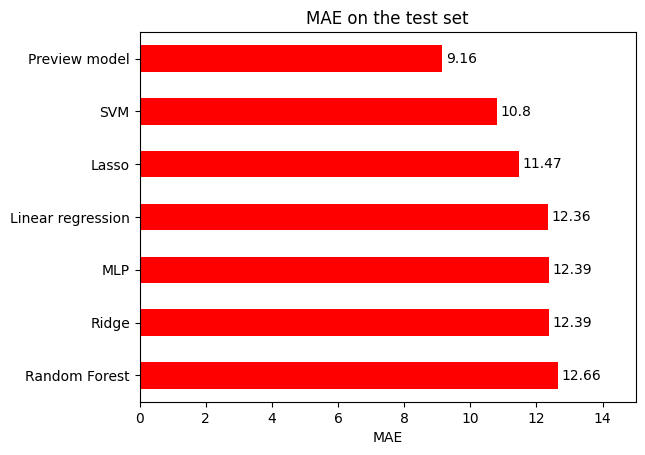

In [60]:
# Plot performance
performance.plot.barh(color='red', title='MAE on the test set', xlabel='MAE', xlim=(0, 15))
for ind in range(performance.shape[0]):
    plt.text(performance.iloc[ind]+0.1, ind, str(performance.iloc[ind]), va='center')